In [3]:
import glob
import os
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import dateutil.parser
from datetime import datetime

path = "./APE_running_data"

def convert(date):
    dt = dateutil.parser.parse(date).replace(tzinfo=None)
    epoch = datetime.utcfromtimestamp(0)
    delta = dt - epoch
    return delta.total_seconds()

colnames = np.array(['time', 'elevation', 'distance', 'speed'])
Datasets_all = []

os.chdir(path)
for file in glob.glob("*.tab"):
    print("Processing {}".format(file))
    dataset = np.genfromtxt(file, skip_header=1,delimiter='\t', converters={0: convert})
    dataset[:,0] -= dataset[0,0]
    dataset = pd.DataFrame(dataset,columns=colnames)
    slope = np.array([])
    window_size_half = 8
    for j in dataset.index:
        index = np.arange(j-window_size_half+1, j+window_size_half+1)
        index = index[(index >= 0) & (index < len(dataset))]
        dataset_part = dataset.iloc[index].dropna()
        regr = lm.LinearRegression()
        regr.fit(dataset_part.distance[:,np.newaxis], np.array(dataset_part.elevation))
        slope = np.append(slope,regr.coef_)
    dataset['slope'] = slope
    if (len(dataset) > 300) == (len(dataset) < 900):
        Datasets_all.append(dataset)


Processing activity_437398751.tab
Processing activity_437398728.tab
Processing activity_404227667.tab
Processing activity_437398762.tab
Processing activity_377304158.tab
Processing activity_447149230.tab
Processing activity_437398739.tab
Processing activity_437398771.tab
Processing activity_396872154.tab
Processing activity_447656990.tab
Processing activity_373735080.tab
Processing activity_373734948.tab
Processing activity_437398768.tab
Processing activity_437398746.tab
Processing activity_404227656.tab
Processing activity_437398721.tab
Processing activity_437398717.tab
Processing activity_437398782.tab
Processing activity_373735106.tab
Processing activity_437398753.tab
Processing activity_437398761.tab
Processing activity_377304230.tab
Processing activity_437398778.tab
Processing activity_437398785.tab
Processing activity_379843442.tab
Processing activity_404227695.tab
Processing activity_367230665.tab
Processing activity_447149252.tab
Processing activity_447149261.tab
Processing act

Number of training sessions:

In [4]:
len(Datasets_all)

30

In [9]:
print(type(Datasets_all))
print(type(Datasets_all[0]))
print(len(Datasets_all[0]))
LENGTH = 10
print(Datasets_all[0][:LENGTH])
#print(Datasets_all[Datasets_all.columns.difference(['speed'])])
print(Datasets_all[0][LENGTH:LENGTH+1]['speed'])
print(Datasets_all[0][:1])
print(Datasets_all[0][1:2]['speed'])

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
616
   time   elevation   distance  speed     slope
0   0.0  858.400024   0.500000  2.372  0.057380
1   1.0  858.400024   1.740000  2.187  0.056713
2   4.0  859.200012  11.300000  2.425  0.056653
3   5.0  859.400024  15.210000  2.690  0.057973
4  11.0  861.000000  36.490002  3.122  0.054931
5  15.0  861.400024  47.270000  3.382  0.053070
6  20.0  861.799988  61.230000  2.904  0.051486
7  25.0  862.400024  72.169998  2.486  0.050327
8  29.0  863.200012  81.059998  2.401  0.048273
9  34.0  863.799988  94.839996  2.426  0.043934
10    2.795
Name: speed, dtype: float64
   time   elevation  distance  speed    slope
0   0.0  858.400024       0.5  2.372  0.05738
1    2.187
Name: speed, dtype: float64


In [5]:
%matplotlib inline
import pylab as pl

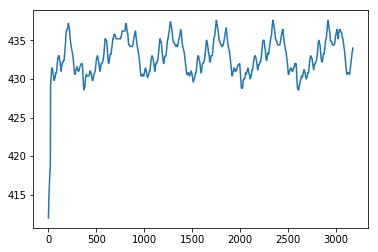

In [6]:
race = 6 
ds = Datasets_all[race]
pl.plot(ds['time'],ds['elevation'] )